In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch as th
import pandas as pd

In [ ]:
def line_eq(x: float, slope: float, y_ircpt: float):
    return slope * x + y_ircpt


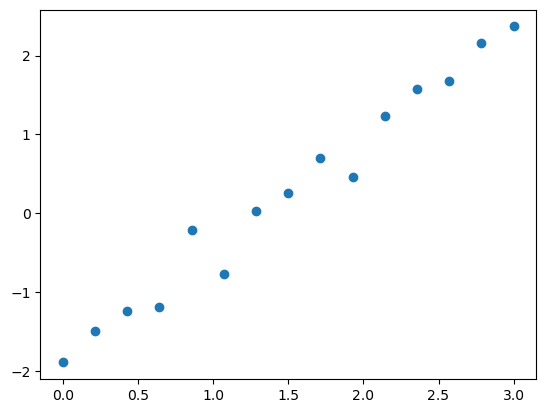

In [ ]:
x = np.linspace(0, 3, 15)
y = line_eq(x, slope=1.5, y_ircpt=-2) + np.random.randn(len(x)) / 4
plt.scatter(x, y)

In [ ]:
class Linear_reg:
    def __init__(self, x, y_true):
        self.x = x
        self.y_true = y_true
        self.m = np.random.rand(1)
        self.c = np.random.rand(1)
        self.arr_error = []
        self.arr_m = []
        self.arr_c = []

    def weigts_and_biases(self):
        return list((self.m, self.c))

    def line_eq(self):
        return self.m * self.x + self.c

    def fn_error(self):
        error = np.sum(((self.m * self.x + self.c) - self.y_true) ** 2) / (
            2 * len(self.x)
        )

        return error

    def fit_model(self, epochs: int, alpha: float, is_errors: bool):
        for epoch in range(epochs):
            pm = self.m - alpha * np.sum(
                ((self.m * self.x + self.c) - self.y_true) * self.x
            ) / (len(self.x))

            pc = self.c - alpha * np.sum((self.m * self.x + self.c) - self.y_true) / (
                len(self.x)
            )

            self.m = pm
            self.c = pc

            if is_errors:
                self.arr_error.append(self.fn_error())
                self.arr_m.append(self.m)
                self.arr_c.append(self.c)
            if epoch % 10 == 0:
                print(f"error is -> {self.fn_error()}")

        # print(f'slope is -> {self.m}\nintercept is -> {self.c}\nerror is -> {self.fn_error()}')


In [ ]:
model = Linear_reg(x=x, y_true=y)
model.fit_model(epochs=100, alpha=0.5, is_errors=True)

error is -> 0.7114841169747916
error is -> 0.10638864729376092
error is -> 0.03552873851271516
error is -> 0.024827765963823703
error is -> 0.022594649139893293
error is -> 0.022005740775139657
error is -> 0.021832725502174646
error is -> 0.021779875626443315
error is -> 0.021763525154841992
error is -> 0.02175844635878615


In [ ]:
model.weigts_and_biases()

[array([1.41606179]), array([-1.88052277])]

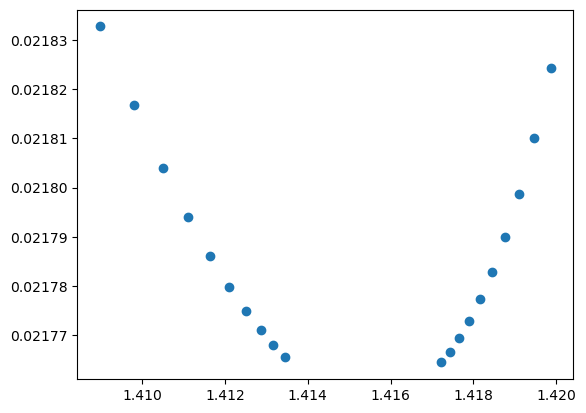

In [ ]:
plt.scatter(model.arr_m[60:80], model.arr_error[60:80])

In [ ]:
model.fn_error()

np.float64(0.021756955149326813)

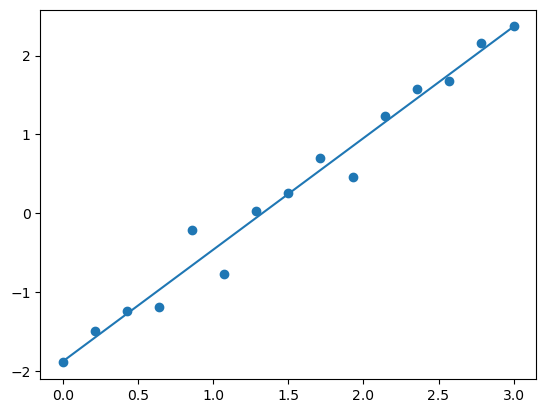

In [ ]:
line_eq(x, slope=1.47, y_ircpt=1.993)
plt.scatter(x, y)
plt.plot(x, model.line_eq())

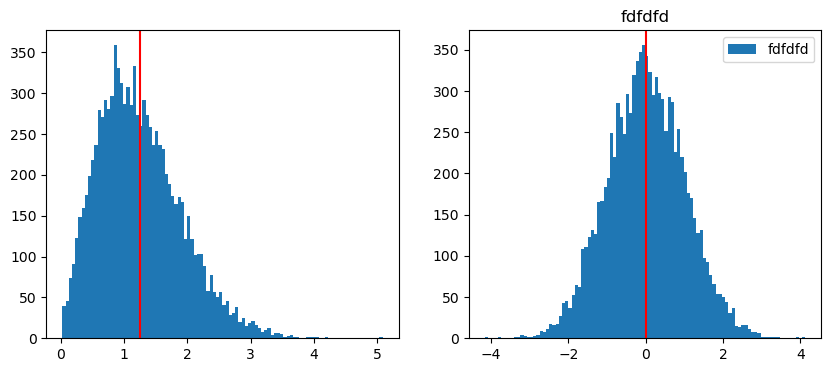

In [ ]:
smp_rayleigh = np.random.rayleigh(size=10000)
smp_norm = np.random.standard_normal(10000)
# plt.hist(smp,bins=100)

fig, ax = plt.subplots(ncols=2, nrows=1)
fig.set_size_inches(10, 4)
ax[0].hist(smp_rayleigh, bins=100)
ax[0].axvline(np.mean(smp_rayleigh), c="r")

ax[1].set_title(label="fdfdfd")
ax[1].hist(smp_norm, bins=100, label="fdfdfd")
ax[1].axvline(np.mean(smp_norm), c="r")
plt.legend()

In [ ]:
x = np.linspace(0, 3, 8)
y = (
    np.linspace(0, 3, 8) + np.random.randn(len(x)) / 5
)  # its a normal distribution with mu = 0 and var = 1

In [ ]:
import numbers as nb

c = nb.Number()

In [ ]:
def eq_project(u: float, t):
    g = 9.8
    return u * t - 0.5 * g * t ** (2)

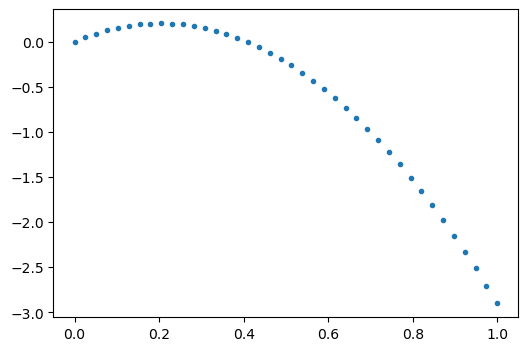

In [ ]:
t = np.linspace(0, 1, 40)

y = eq_project(2, t)
fig, ax = plt.subplots()


fig.set_size_inches(6, 4)
ax.scatter(t, y, marker=".")

In [ ]:
y_data = (
    y + np.random.randint(-1, 2, size=len(y)) * np.random.random_sample(len(y)) / 3 + 5
)
np.save("ydata.npy", y_data)

In [ ]:
# np.random.random_sample(len(y))*
np.random.randint(-1, 2, size=len(y))

array([ 1,  0,  0, -1,  1,  1,  0, -1, -1,  0,  0, -1,  0,  0,  1,  1,  1,
        0,  0,  1, -1,  1, -1,  0,  1,  0, -1,  0,  1,  0,  0,  0,  0,  1,
       -1,  0,  0,  0,  1, -1], dtype=int32)

In [ ]:
ydata = np.load("./ydata.npy")

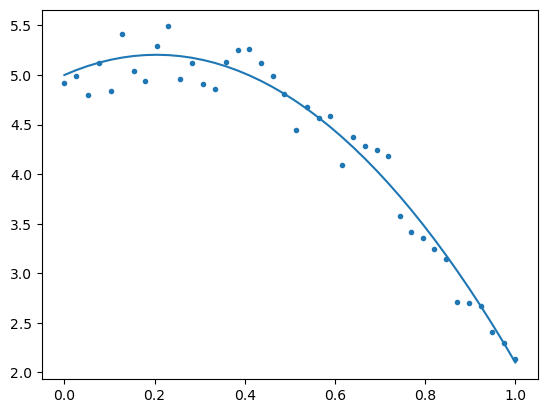

In [ ]:
ax1 = plt.subplot()

ax1.scatter(t, ydata, marker=".")
ax1.plot(t, y + 5)

In [ ]:
class PINN(th.nn.Module):
    def __init__(self, n_hidden=20):
        super(PINN, self).__init__()
        self.net = nn.Sequential

In [ ]:
w = np.random.randn(5)
x = np.random.randn(5, 5)
b = np.random.randn(5)

In [ ]:
np.dot(w, x) + b

array([ 1.74951543,  1.45925053, -1.76849034, -2.40479802, -4.00074147])

In [ ]:
class Linear_regression:
    def __init__(self, lr: float, no_itr: int):
        self.lr = lr
        self.no_itr = no_itr
        self.weight = None
        self.bias = None

    def fit(self, X, y):
        no_samples, no_features = X.shape
        self.weight = np.random.rand(no_features)
        self.bias = 0

        for i in range(self.no_itr):
            y_pred = np.dot(X, self.weight) + self.bias

            dw = (1 / no_samples) * np.dot(X.T, (y_pred - y))

            db = (1 / no_samples) * np.sum((y_pred - y))

            loss = (1 / 2 * no_samples) * np.sum((y_pred - y) ** 2)

            self.weight = self.weight + self.lr * dw
            self.bias = self.bias + self.lr * db

            if i + 1 % 25 == 0:
                print(f"loss is {loss}\n")
            return self

    def predict(self, X):
        return np.dot(X, self.weight) + self.bias


In [ ]:
md = Linear_regression(lr=0.2, no_itr=500)

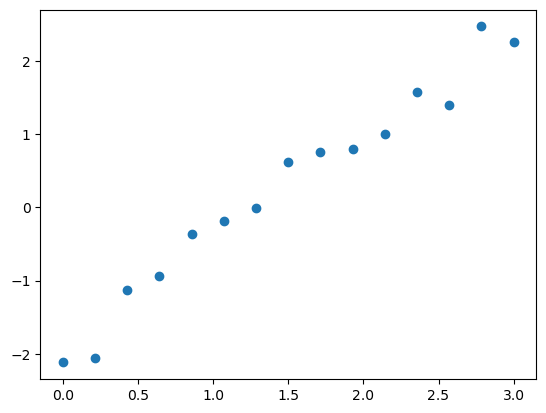

In [ ]:
x = np.linspace(0, 3, 15)
y = line_eq(x, slope=1.5, y_ircpt=-2) + np.random.randn(len(x)) / 4
plt.scatter(x, y)

In [ ]:
md.fit(X=x, y=y)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
df = pd.read_csv("./train.csv")

In [ ]:
cols = []
for i in df.columns:
    if df[i].dtype not in ["int64", "float64"]:
        print(df[i].dtype)
        cols.append(i)


object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object
object


In [ ]:
# df.info
len(cols)


43

In [ ]:
df = df.drop(columns=cols)

In [ ]:
df.dropna()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [ ]:
import seaborn as sns

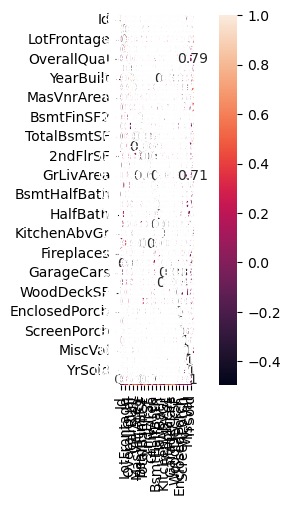

In [ ]:
ax = sns.heatmap(df.corr(), annot=True)
ax.set_aspect(5)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
df = pd.read_csv('./height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
X = df[['Weight']]
y = df['Height']

Text(0, 0.5, 'Height')

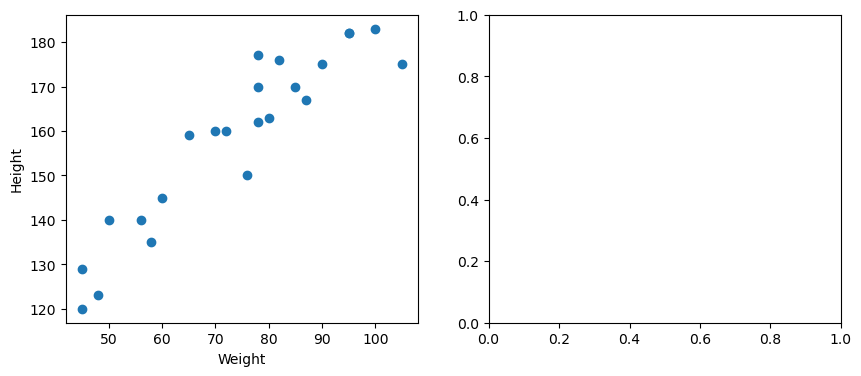

In [5]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,4)
ax[0].scatter(X,y)
ax[0].set_xlabel('Weight')
ax[0].set_ylabel('Height')


In [6]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,shuffle=True)

In [8]:
X_test

,Weight
13,100
8,95
9,78
7,90
15,78


In [11]:
scalar = StandardScaler()

In [20]:
X_train = scalar.fit_transform(X_train)

In [21]:
X_test = scalar.transform(X_test)

In [24]:
X_test.std()

np.float64(0.5186440208608687)

In [25]:
regression = LinearRegression()


In [26]:
regression.fit(X_train,y=y_train)

LinearRegression()

In [ ]:
print(f'{regression.intercept_}\n{regression.coef_}')


153.11111111111111
[16.90090813]


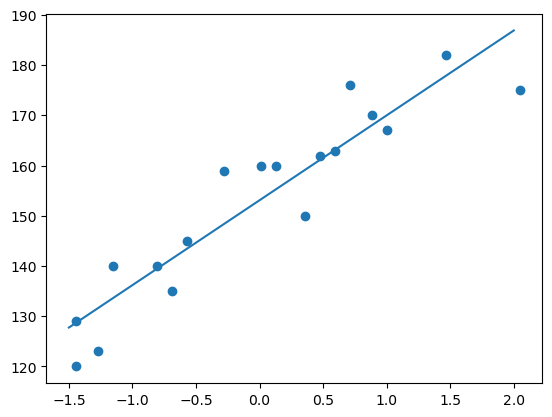

In [33]:
plt.scatter(X_train,y_train)
line_eq = lambda x,m,c :   m*x + c

lx = np.linspace(-1.5,2,20)

ly = line_eq(x=lx,c=153.1,m=16.9) 
plt.plot(lx,ly)

In [41]:
y_pred = regression.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score,adjusted_rand_score

In [46]:
print(f' mean_absolute_error is -> {mean_absolute_error(y_true=y_test,y_pred=y_pred)}\n mean_squared_error is -> {mean_squared_error(y_true=y_test,y_pred=y_pred) ** .5}')

 mean_absolute_error is -> 6.216775988868994
 mean_squared_error is -> 8.377975890831149


In [57]:
r2_score(y_true=y_test,y_pred=y_pred)

-2.1002862202892216

In [60]:
import statsmodels.api as sm

In [61]:
mdl = sm.OLS(y_train,X_train)

In [64]:
obj = mdl.fit()

In [65]:
obj.summary()

c:\Users\PAndA\miniconda3\envs\env_mh\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.046
Method:                 Least Squares   F-statistic:                             0.2067
Date:                Tue, 25 Feb 2025   Prob (F-statistic):                       0.655
Time:                        18:40:55   Log-Likelihood:                         -116.12
No. Observations:                  18   AIC:                                      234.2
Df Residuals:                      17   BIC:                                      235.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            16.9009     37.171      0.455      0.655     -61.522      95.324
==============================================================================
Omnibus:                        0.753   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.686   Jarque-Bera (JB):                0.710
Skew:                          -0.212   Prob(JB):                        0.701
Kurtosis:                       2.124   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""